In [265]:
import matplotlib.pyplot as plt
from functools import reduce
import pandas as pd
import numpy as np
plt.style.use("ggplot")
%matplotlib inline

# 1. Data Cleaning

In [266]:
dfi=pd.read_csv("testset.csv")
df = pd.read_csv("testset.csv")

In [267]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


## 1.1Extracting months, days and hours from datetime_utc for plotting graphs

In [268]:
df['Date'] = pd.to_datetime(df['datetime_utc'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour

In [269]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_wdird,_wdire,_wgustm,_windchillm,_wspdm,Date,year,month,day,hour
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,280.0,West,NaN,NaN,7.4,1996-11-01 11:00:00,1996,11,1,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 12:00:00,1996,11,1,12
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 13:00:00,1996,11,1,13
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 14:00:00,1996,11,1,14
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0.0,North,NaN,NaN,0.0,1996-11-01 16:00:00,1996,11,1,16


In [270]:
df.drop(['datetime_utc'],axis=1,inplace=True)

In [271]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,...,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm,year,month,day,hour
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,...,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000,100990.000000,100990.000000,100990.000000,100990.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,...,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463,2004.934588,6.579344,15.690049,10.928844
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,...,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157,5.801997,3.475841,8.769718,6.854328
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,...,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000,2001.000000,4.000000,8.000000,5.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,...,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000,2003.000000,7.000000,16.000000,11.000000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,...,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000,2009.000000,10.000000,23.000000,17.000000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,...,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000,2017.000000,12.000000,31.000000,23.000000


# 1.2Removing Precipm as it is empty only

In [272]:
df.drop([' _precipm'],axis=1,inplace=True)

In [273]:
df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,...,_wdird,_wdire,_wgustm,_windchillm,_wspdm,Date,year,month,day,hour
0,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,...,280.0,West,NaN,NaN,7.4,1996-11-01 11:00:00,1996,11,1,11
1,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,...,0.0,North,NaN,NaN,NaN,1996-11-01 12:00:00,1996,11,1,12
2,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,...,0.0,North,NaN,NaN,NaN,1996-11-01 13:00:00,1996,11,1,13
3,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,...,0.0,North,NaN,NaN,NaN,1996-11-01 14:00:00,1996,11,1,14
4,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,...,0.0,North,NaN,NaN,0.0,1996-11-01 16:00:00,1996,11,1,16


In [274]:
for i in df.columns:
    grp = df.groupby(i)[i].count()[:3]
    print(i,grp)

 _conds  _conds
Blowing Sand     378
Clear           3129
Drizzle          112
Name:  _conds, dtype: int64
 _dewptm  _dewptm
-24.0      1
-23.0      1
-21.0      1
-14.0      1
-12.0      2
-11.0      1
-9.0       2
-8.0       2
-7.0      12
-6.0       7
-5.0      17
-4.0      15
-3.0      34
-2.0      62
-1.0      85
 0.0     164
 1.0     361
 2.0     586
 3.0     920
Name:  _dewptm, dtype: int64
 _fog  _fog
0    93952
1     7038
Name:  _fog, dtype: int64
 _hail  _hail
0    100977
1        13
Name:  _hail, dtype: int64
 _heatindexm Series([], Name:  _heatindexm, dtype: int64)
 _hum Series([], Name:  _hum, dtype: int64)
 _pressurem  _pressurem
-9999.0    751
 0.0         3
 2.0         1
Name:  _pressurem, dtype: int64
 _rain  _rain
0    98338
1     2652
Name:  _rain, dtype: int64
 _snow  _snow
0    100989
1         1
Name:  _snow, dtype: int64
 _tempm  _tempm
1.0     1
3.0    12
Name:  _tempm, dtype: int64
 _thunder  _thunder
0    100038
1       952
Name:  _thunder, dtype: int64
 _tor

## 1.3Hail, tornado and snow have most values Zero, therefore they can be removed.

In [275]:
df.drop([' _hail',' _tornado',' _snow',' _conds',' _wdire','Date'],axis=1,inplace=True)

In [276]:
df.head()

,_dewptm,_fog,_heatindexm,_hum,_pressurem,_rain,_tempm,_thunder,_vism,_wdird,_wgustm,_windchillm,_wspdm,year,month,day,hour
0,9.0,0,NaN,27.0,1010.0,0,30.0,0,5.0,280.0,NaN,NaN,7.4,1996,11,1,11
1,10.0,0,NaN,32.0,-9999.0,0,28.0,0,NaN,0.0,NaN,NaN,NaN,1996,11,1,12
2,11.0,0,NaN,44.0,-9999.0,0,24.0,0,NaN,0.0,NaN,NaN,NaN,1996,11,1,13
3,10.0,0,NaN,41.0,1010.0,0,24.0,0,2.0,0.0,NaN,NaN,NaN,1996,11,1,14
4,11.0,0,NaN,47.0,1011.0,0,23.0,0,1.2,0.0,NaN,NaN,0.0,1996,11,1,16


## Removing Outliers

In [277]:
l = 0.05
h = 0.95
quant = df.quantile([l,h])
df = df.apply(lambda x: x[(x>quant.loc[l,x.name]) & (x< quant.loc[h,x.name])],axis = 0)

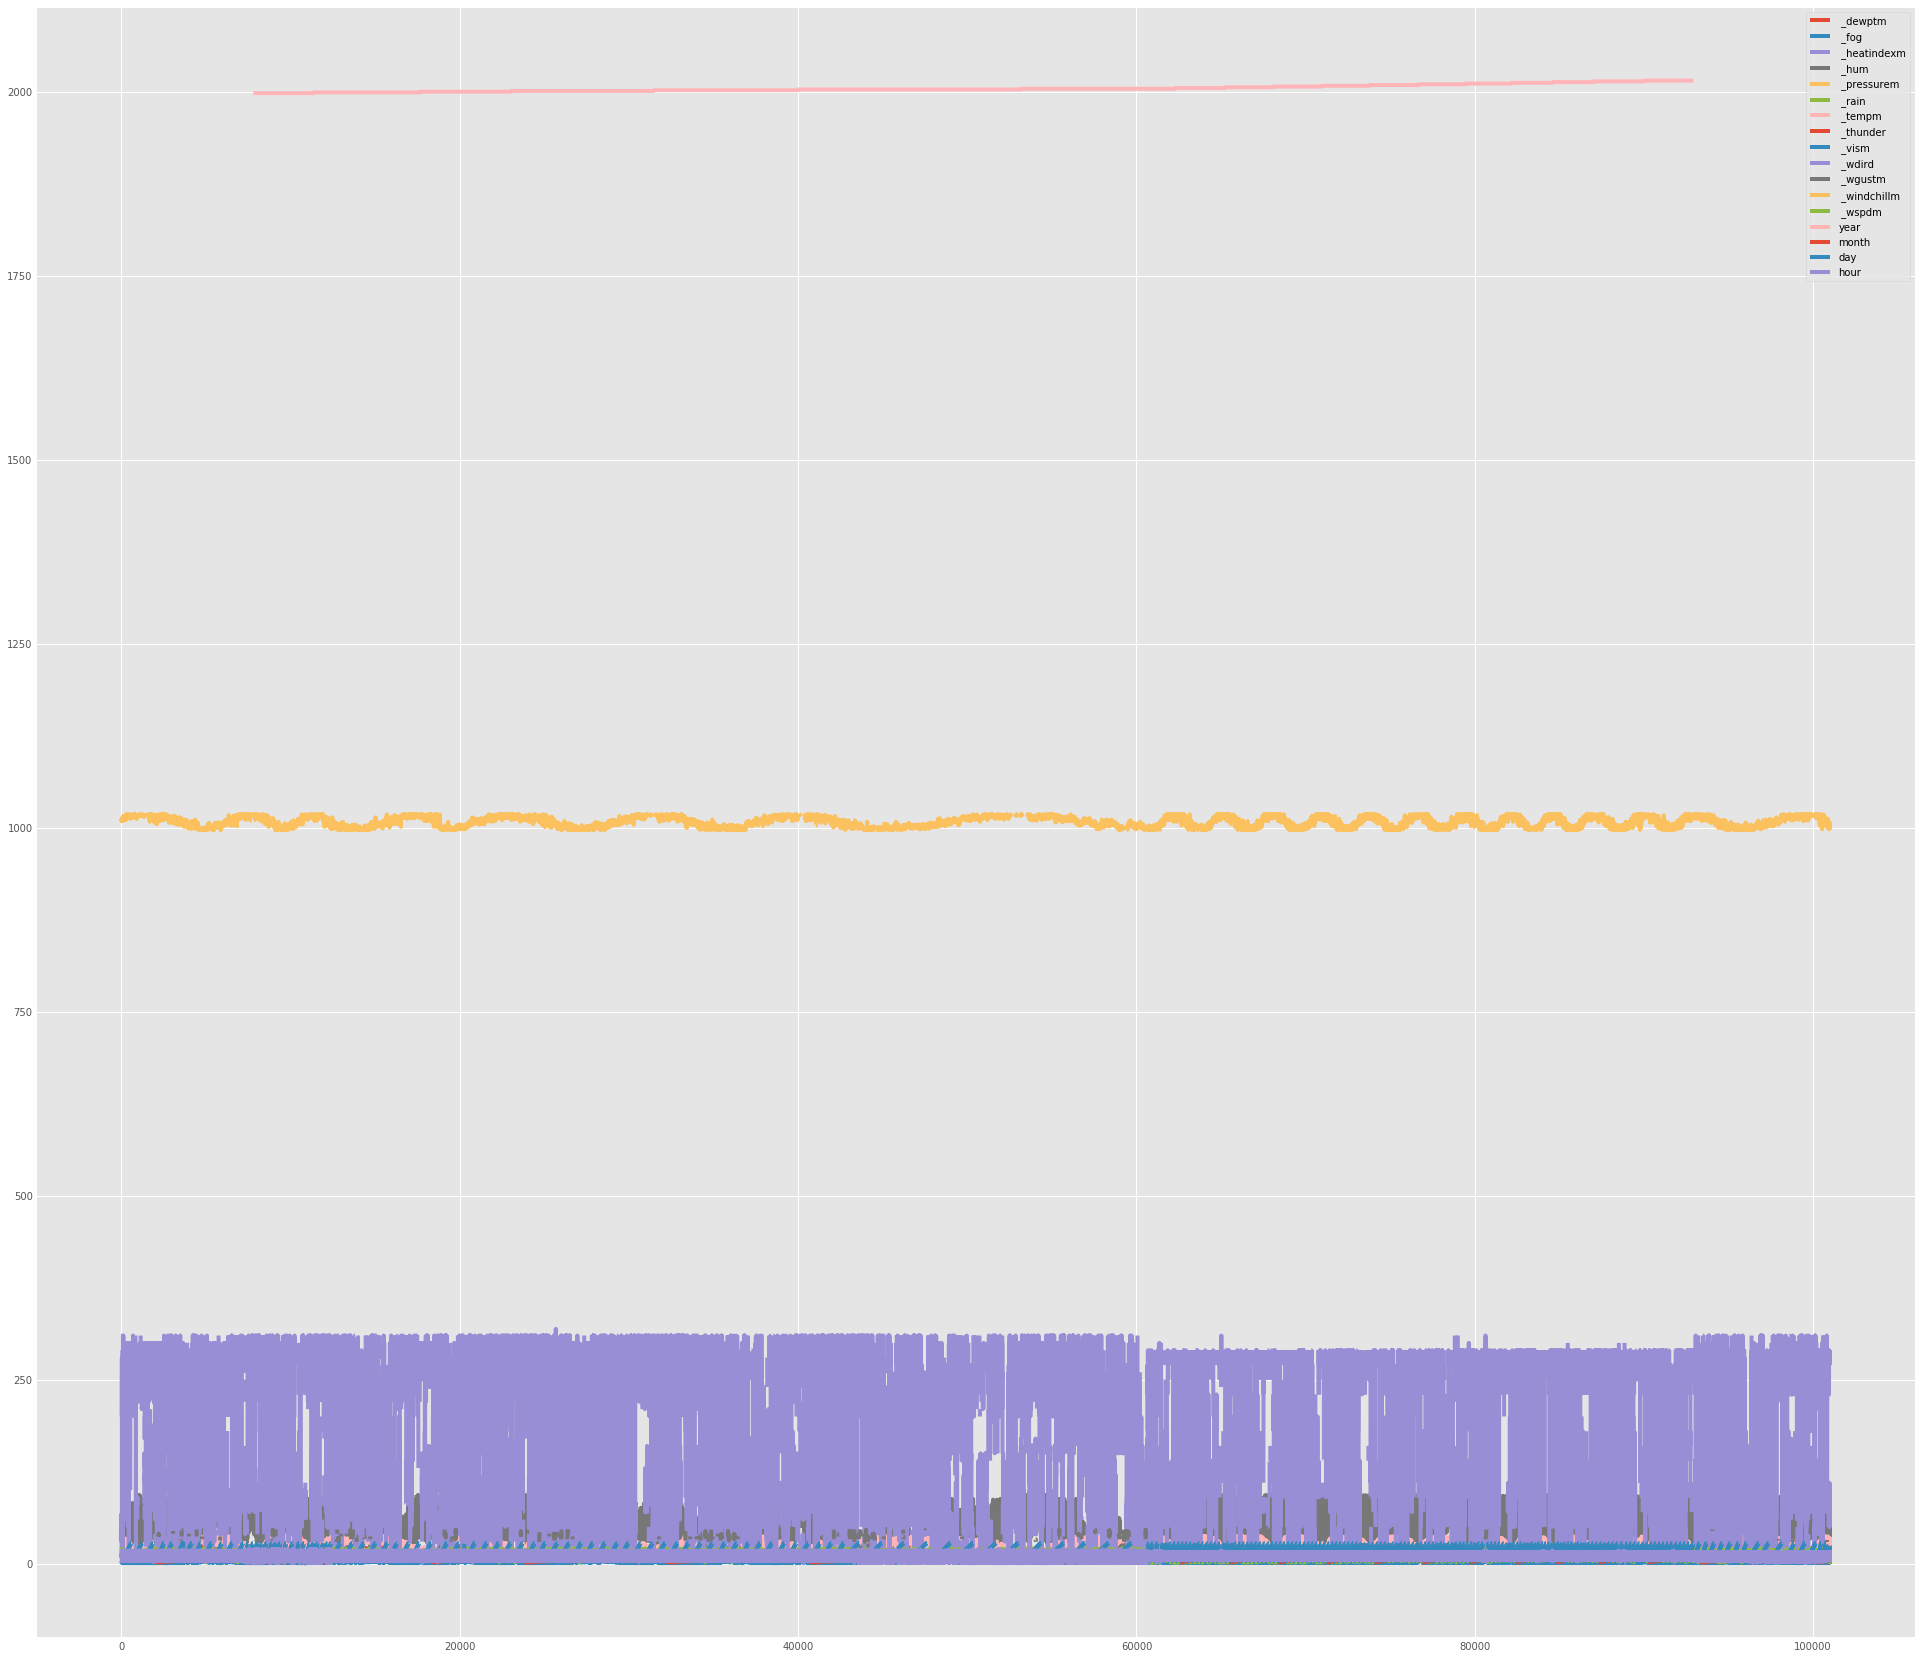

In [278]:

df.plot(figsize = (30,30))

In [279]:
df.describe()

,_dewptm,_fog,_heatindexm,_hum,_pressurem,_rain,_tempm,_thunder,_vism,_wdird,_wgustm,_windchillm,_wspdm,year,month,day,hour
count,84023.000000,0.0,26179.000000,87790.000000,89040.000000,0.0,89507.000000,0.0,84829.000000,59679.000000,945.000000,464.000000,64249.000000,85145.000000,83131.000000,86405.000000,81944.000000
mean,15.304702,NaN,35.485358,57.298998,1007.885748,NaN,25.562481,NaN,2.239128,186.341092,37.214180,5.582759,9.565150,2004.612261,6.599500,15.467577,10.319120
std,5.789321,NaN,4.168476,20.153828,6.347378,NaN,7.060234,NaN,0.886655,90.804762,4.277688,0.942427,4.519805,4.673520,2.859377,7.473510,5.514845
min,6.000000,NaN,28.400000,20.000000,997.000000,NaN,11.000000,NaN,0.700000,6.000000,29.600000,3.700000,1.900000,1998.000000,2.000000,3.000000,1.000000
25%,10.000000,NaN,31.900000,40.000000,1002.000000,NaN,20.000000,NaN,1.800000,100.000000,33.300000,4.900000,5.600000,2001.000000,4.000000,9.000000,6.000000
50%,15.000000,NaN,35.100000,58.000000,1008.000000,NaN,27.000000,NaN,2.000000,210.000000,37.000000,5.700000,9.300000,2003.000000,7.000000,15.000000,10.000000
75%,20.000000,NaN,39.000000,74.000000,1014.000000,NaN,31.000000,NaN,3.000000,270.000000,40.700000,6.200000,13.000000,2008.000000,9.000000,22.000000,15.000000
max,25.000000,NaN,44.300000,93.000000,1018.000000,NaN,37.000000,NaN,4.000000,319.000000,46.300000,6.800000,21.600000,2015.000000,11.000000,28.000000,20.000000


Text(0.5,1,'Humidity of different months')

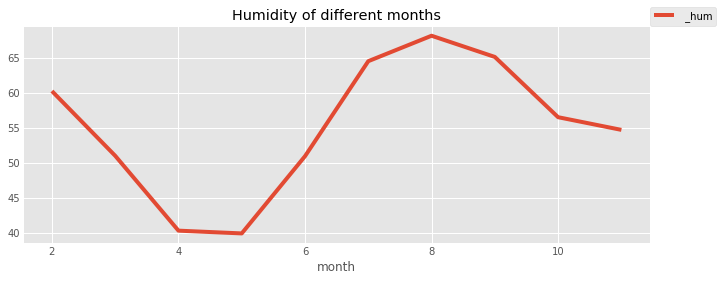

In [280]:
humidity = df.groupby('month')[' _hum'].mean()
humidity.plot(figsize=(10,4))
plt.legend(loc=(1,1))
plt.title("Humidity of different months")

In [288]:
valid_columns = df.columns.tolist()
valid_columns.remove(' _pressurem')
valid_columns.remove(' _tempm')
valid_columns.remove('year')
valid_columns.remove('month')
valid_columns.remove('day')
valid_columns.remove('hour')
valid_columns.remove(' _rain')
valid_columns.remove(' _thunder')
valid_columns.remove(' _fog')
valid_columns.remove(' _windchillm')
valid_columns.remove(' _heatindexm')
df.columns

Index([' _dewptm', ' _fog', ' _heatindexm', ' _hum', ' _pressurem', ' _rain',
       ' _tempm', ' _thunder', ' _vism', ' _wdird', ' _wgustm', ' _windchillm',
       ' _wspdm', 'year', 'month', 'day', 'hour'],
      dtype='object')

# Make a plot of different numeric features like rain, snow, dewptm, etc. over the duration of a month or year or day. 

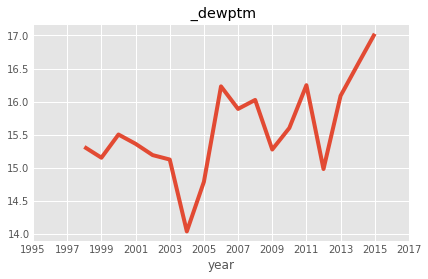

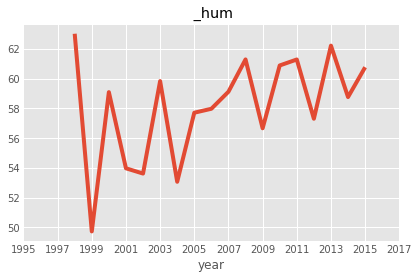

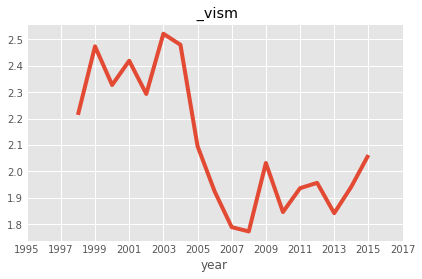

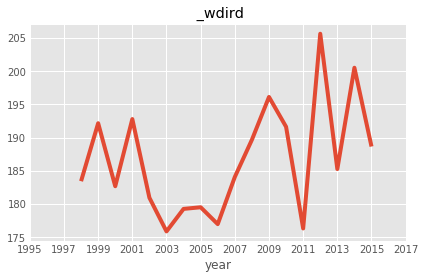

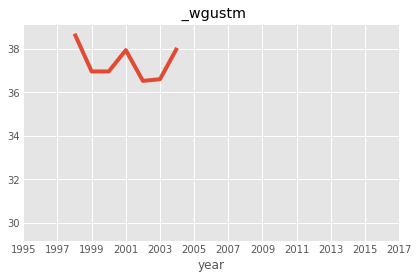

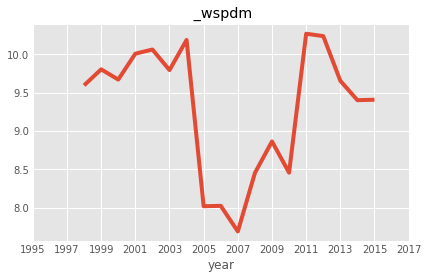

In [285]:
count = int(1)
#plt.subplots(figsize=(40,40))
for value in valid_columns:
    dew_monthwise = df.groupby('year')[value].mean()
    dew_monthwise.plot()
    plt.xticks(np.arange(1995,2018,2))
    #plt.subplot(5,2,count)
    count = count+1
    plt.title(value)
    plt.show()

# Make a plot of different numeric features like rain, snow, dewptm, etc. over the duration of a month or year or day.

In [286]:
dfi.rename(columns = {" _conds": "cond"},inplace=True)

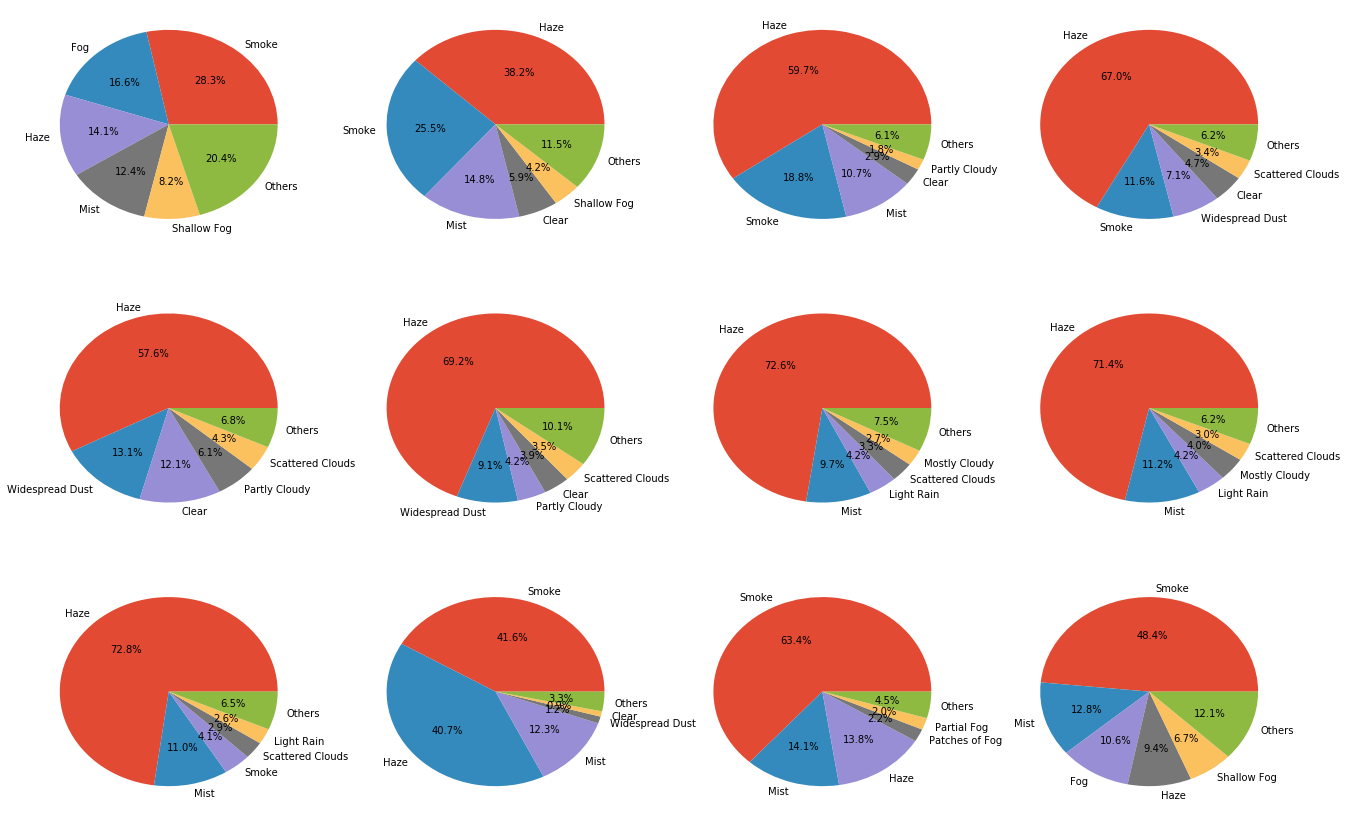

In [287]:
l = []
count = int(1)
plt.subplots(figsize = (20,20))
for month,data in group:
    ab =data['cond'].value_counts()
    ab = dict(ab)
    l.append(ab)

for i in l:
    activities = list(i.keys())
    slices = list(i.values())
    activities = activities[:5]
    activities.append("Others")
    other = slices[6:]
    slices = slices[:5]
    other = reduce(lambda a,b : a+b,other)
    slices.append(other)
    plt.subplot(4,4,count)
    count = count+1
    plt.pie(slices, labels=activities,autopct = "%1.1f%%")
plt.show()